NAME: HITARTH BHATT   SAP-ID: 60009220209 BATCH: D1-2

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Custom metrics tracking
class MetricsLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            self.losses.append(logs.get('loss'))
            self.accuracies.append(logs.get('categorical_accuracy'))

metrics_logger = MetricsLogger()
metrics_logger.losses = []
metrics_logger.accuracies = []


In [ ]:
# Custom training loop
def train_model(X_train, y_train, model, epochs, batch_size, metrics_logger):
    for epoch in range(epochs):
        # Reset metrics for each epoch
        epoch_loss_metric = tf.keras.metrics.Mean()
        epoch_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

        num_batches = X_train.shape[0] // batch_size
        for batch_start in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[batch_start:batch_start + batch_size]
            y_batch = y_train[batch_start:batch_start + batch_size]

            with tf.GradientTape() as tape:
                # Forward pass
                logits = model(X_batch, training=True)
                loss = model.compiled_loss(y_batch, logits)

            # Compute gradients and update weights
            gradients = tape.gradient(loss, model.trainable_variables)
            model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            # Compute metrics
            epoch_accuracy_metric.update_state(y_batch, logits)
            epoch_loss_metric.update_state(loss)

        # Log metrics at the end of the epoch
        metrics_logger.losses.append(epoch_loss_metric.result().numpy())
        metrics_logger.accuracies.append(epoch_accuracy_metric.result().numpy())

        # Print epoch completion
        print(f'Epoch {epoch + 1}/{epochs} completed.')


In [ ]:
# Define number of epochs and batch size
epochs = 100  # Number of epochs
batch_size = 16  # Batch size

In [ ]:
# Train the model with the custom loop
train_model(X_train, y_train, model, epochs, batch_size, metrics_logger)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Epoch 42/100 completed.
E

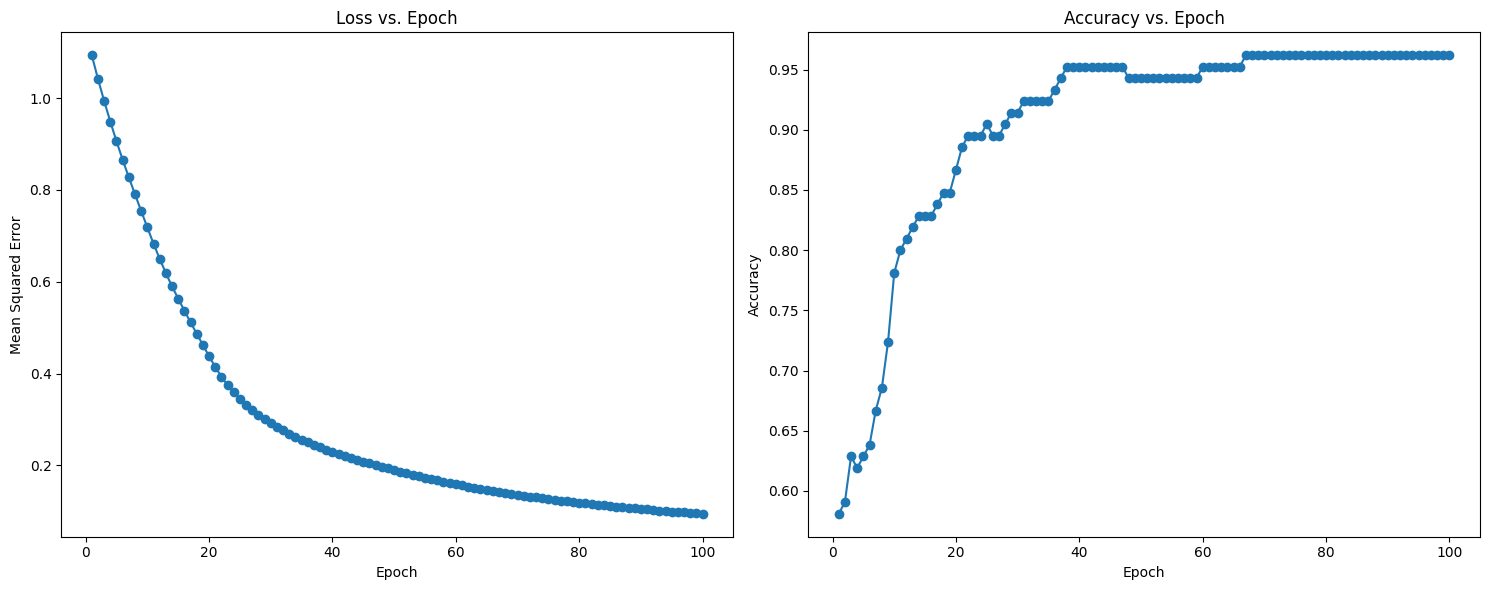

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 1.0000 - loss: 0.0615 
Test Loss: 0.0598
Test Accuracy: 100.00%


In [ ]:
# Plot MSE and accuracy
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), metrics_logger.losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), metrics_logger.accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix


conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=data.target_names))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

